In [2]:
# 데이터 분석을 위한 패키지
import numpy as np
import pandas as pd

In [3]:
# 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import koreanize_matplotlib

In [1]:
!pip install html5lib

In [5]:
# 모든 컬럼,행을 출력하도록 설정
pd.set_option('display.max_columns', None) # None으로 설정하면 모든 컬럼 출력
pd.set_option('display.max_rows', 50) #None으로 설정하면 모든 행 출력

In [29]:
pd.options.display.float_format = '{:,.2f}'.format

In [48]:
# 2차전지 테마주 네이버 증권 url
url = 'https://finance.naver.com/sise/sise_group_detail.naver?type=theme&no=64'

In [9]:
table = pd.read_html(url, encoding = 'cp949')

D:\kdt\anaconda3\Lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [13]:
len(table)

3

In [14]:
table[0]

업종명    전일대비 전일대비 등락현황                  등락그래프
           업종명    전일대비        전체     상승   보합   하락 등락그래프
0          NaN     NaN       NaN    NaN  NaN  NaN   NaN
1  2차전지  테마 개요  +6.28%     138.0  131.0  0.0  7.0   52%
2          NaN     NaN       NaN    NaN  NaN  NaN   NaN
3          NaN     NaN       NaN    NaN  NaN  NaN   NaN

In [15]:
table[1]

,0,1,2,3,4,5
0,거래량,매수호가,거래대금(백만),시가총액(억),영업이익(억),PER(배)
1,시가,매도호가,전일거래량,자산총계(억),영업이익증가율,ROE(%)
2,고가,매수총잔량,외국인비율,부채총계(억),당기순이익(억),ROA(%)
3,저가,매도총잔량,상장주식수(천주),매출액(억),주당순이익(원),PBR(배)
4,NaN,NaN,NaN,매출액증가율,보통주배당금(원),유보율(%)


In [16]:
table[2]

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,코이즈 *,테마 편입 사유,1943.0,상한가 448,+29.97%,1943.0,0.0,9541863.0,17872.0,5058961.0,NaN,NaN
2,대한유화,테마 편입 사유,78700.0,"상승 10,000",+14.56%,78700.0,78800.0,104378.0,8199.0,33004.0,NaN,NaN
3,유일에너테크 *,테마 편입 사유,1253.0,상승 156,+14.22%,1244.0,1253.0,224573.0,269.0,89237.0,NaN,NaN
4,코칩 *,테마 편입 사유,9030.0,"상승 1,030",+12.88%,9020.0,9030.0,40178.0,351.0,52462.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
136,에스에프에이 *,테마 편입 사유,19730.0,하락 520,-2.57%,19730.0,19740.0,184684.0,3670.0,137054.0,NaN,NaN
137,한울반도체 *,테마 편입 사유,2440.0,하락 110,-4.31%,2435.0,2440.0,185769.0,461.0,207626.0,NaN,NaN
138,금양,테마 편입 사유,21150.0,"하락 1,200",-5.37%,21100.0,21150.0,2995271.0,64484.0,1428919.0,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
type(table[2])

pandas.core.frame.DataFrame

In [18]:
df = table[2]

In [21]:
# 결측치 확인
df.isna().sum()

종목명              3
종목명.1            3
현재가              3
전일비              3
등락률              3
매수호가             3
매도호가             3
거래량              3
거래대금             3
전일거래량            3
토론실            141
Unnamed: 11    141
dtype: int64

In [20]:
df.shape

(141, 12)

In [22]:
df.dropna?

Signature:
df.dropna(
    *,
    axis: 'Axis' = 0,
    how: 'AnyAll | lib.NoDefault' = <no_default>,
    thresh: 'int | lib.NoDefault' = <no_default>,
    subset: 'IndexLabel | None' = None,
    inplace: 'bool' = False,
    ignore_index: 'bool' = False,
) -> 'DataFrame | None'
Docstring:
Remove missing values.

See the :ref:`User Guide <missing_data>` for more on which values are
considered missing, and how to work with missing data.

Parameters
----------
axis : {0 or 'index', 1 or 'columns'}, default 0
    Determine if rows or columns which contain missing values are
    removed.

    * 0, or 'index' : Drop rows which contain missing values.
    * 1, or 'columns' : Drop columns which contain missing value.

    Only a single axis is allowed.

how : {'any', 'all'}, default 'any'
    Determine if row or column is removed from DataFrame, when we have
    at least one NA or all NA.

    * 'any' : If any NA values are present, drop that row or column.
    * 'all' : If all values are NA, d

In [25]:
# 모든 행, 모든열이 NaN인 
df = df.dropna(how='all', axis=0).dropna(how='all', axis=1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 1 to 138
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   종목명     138 non-null    object 
 1   종목명.1   138 non-null    object 
 2   현재가     138 non-null    float64
 3   전일비     138 non-null    object 
 4   등락률     138 non-null    object 
 5   매수호가    138 non-null    float64
 6   매도호가    138 non-null    float64
 7   거래량     138 non-null    float64
 8   거래대금    138 non-null    float64
 9   전일거래량   138 non-null    float64
dtypes: float64(6), object(4)
memory usage: 11.9+ KB


In [30]:
# 수치형 컬럼의 기술 통계 요약
df.describe()

,현재가,매수호가,매도호가,거래량,거래대금,전일거래량
count,138.00,138.00,138.00,138.00,138.00,138.00
mean,"39,757.59","39,721.16","39,764.15","264,678.76","9,039.26","292,740.61"
std,"140,097.70","139,997.99","140,111.63","854,355.26","25,827.67","519,582.22"
min,395.00,395.00,0.00,"9,060.00",25.00,"10,869.00"
25%,"3,713.75","3,707.50","3,713.75","44,544.00",294.50,"71,100.75"
50%,"7,380.00","7,365.00","7,380.00","106,782.00",825.50,"168,329.50"
75%,"23,300.00","23,287.50","23,337.50","243,067.00","2,532.00","321,564.50"
max,"1,532,000.00","1,531,000.00","1,532,000.00","9,541,863.00","171,175.00","5,058,961.00"


In [28]:
# 범주형 컬럼의 기술 통계 요약
df.describe(include='O')

,종목명,종목명.1,전일비,등락률
count,138,138,138,138
unique,138,1,112,131
top,코이즈 *,테마 편입 사유,상승 195,+6.90%
freq,1,138,3,3


In [34]:
# 종목명.1 컬럼 제거
df = df.drop('종목명.1',axis=1)

In [35]:
df.head(1)

,종목명,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,코이즈 *,"1,943.00",상한가 448,+29.97%,"1,943.00",0.00,"9,541,863.00","17,872.00","5,058,961.00"


<Axes: ylabel='종목명'>

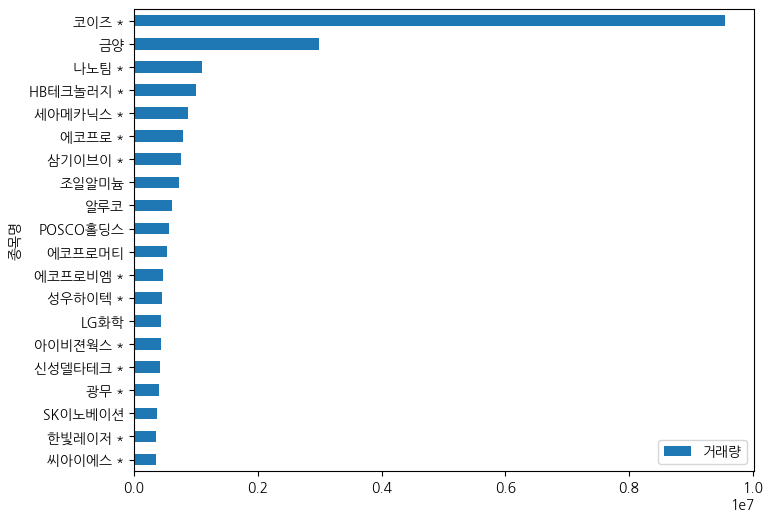

In [47]:
# 특정 테마주 거래량 상위 20종목
df[['종목명','거래량']].sort_values('거래량').tail(20).set_index('종목명').plot(kind='barh', figsize=(8,6))